# Conditioning and Stability

### Problem 1

In [37]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy
import sympy as sy
from scipy import linalg as la

In [38]:
def p_1(A):
    U, s, Vh = scipy.linalg.svd(A)
    if s.min() == 0:
        k = np.inf()
    else:
        k = s.max() / s.min()
    return k

### Problem 1

In [45]:
def p_2():
    w_roots_orig = np.arange(1, 21) #original roots are just 1, 2,...20
    
    
    #Get wilkinson polynomial coefficients using Sympy
    x, i = sy.symbols('x i') #convert x and i into things that sympy can use
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs_orig = np.array(w.all_coeffs()) #original wilkinson coefficients
    
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(10, 10))
    plt.scatter(w_roots_orig.real, w_roots_orig.imag, s = 100.0)
    plt.xlabel('Real axis')
    plt.ylabel('Imaginary axis')
    
    q = 0
    while q < 100:
        h = np.random.normal(1, 10e-10, 21)
        new_coeffs = w_coeffs_orig*h
        new_roots = np.roots(np.poly1d(new_coeffs))
        plt.scatter(new_roots.real, new_roots.imag, s = 2.0)
        q += 1
    
    abs_con = la.norm(new_roots - w_roots_orig, np.inf) / la.norm(h, np.inf)
    rel_con = abs_con*(la.norm(w_coeffs_orig, np.inf)) / la.norm(w_roots_orig, np.inf) 
    print('Relative norm ', rel_con)
    print('Absolute norm ', abs_con)


Relative norm  1.53630235697471e+19
Absolute norm  22.2591871257324


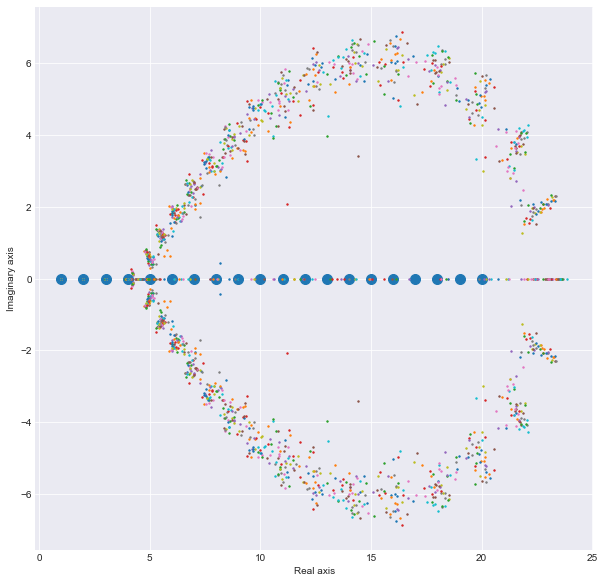

In [46]:
p_2()

### Problem 3

In [47]:
def p_3(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    
    A_hat = A + H
    
    eigs = la.eigvals(A)
    eigs_hat = la.eigvals(A_hat)
    
    k_hat = la.norm(eigs - eigs_hat, ord = 2) / la.norm(H, ord = 2)
    k = k_hat * la.norm(A, ord = 2) / la.norm(eigs, ord = 2)
    
    return k_hat, k

### Problem 4

In [60]:
def p_4(bounds, res=200):
    xmin, xmax, ymin, ymax = bounds
    xdom = np.linspace(xmin, xmax, res)
    ydom = np.linspace(ymin, ymax, res)
    k_hat_mat = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            k_hat_mat[i,j] = p_3(np.array([[1, xdom[i]],[ydom[j], 1]]))[1]
    
    plt.pcolormesh(xdom, ydom, k_hat_mat, cmap = 'gray_r')
    plt.colorbar()
    plt.title('Condition number')
    plt.xlabel('x')
    plt.ylabel('y')

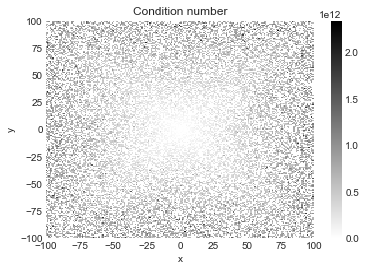

In [61]:
p_4([-100, 100, -100, 100])

### Problem 5

In [97]:
def p_5():
    xk, yk = np.load('stability_data.npy').T #import data
    dom = np.linspace(xk.min(), xk.max(), 100)
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Accent')
    plt.figure(figsize=(20, 10))
    
    for n in range(8, 20, 2):
        X = np.vander(xk, n+1) #get X matrix
        beta_normal = np.zeros(n+1) #initilase beta
        beta_normal = la.inv(X.T @ X) @ X.T @ yk
        f_normal = np.poly1d(beta_normal.flatten())
        
        beta_qr = np.zeros(n+1) #initialise beta
        Q, R = la.qr(X, mode='economic')
        beta_qr = la.solve_triangular(R, Q.T @ yk)
        f_qr = np.poly1d(beta_qr.flatten())
        
        fwd_err_qr = la.norm(X @ beta_qr - yk, ord = 2)
        fwd_err_norm = la.norm(X @ beta_normal - yk, ord = 2)
        
        place = 0.5*n - 3
        plt.subplot(2, 3, place)
        plt.scatter(xk, yk, color=palette(4), s=3.0)
        plt.plot(dom, f_qr(dom), color=palette(5), label = 'QR')
        plt.plot(dom, f_normal(dom), color=palette(6), label = 'Normal')
        plt.xlim(0.0, 1.0)
        plt.ylim(0.0, 25.0)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('n = ' +str(n) +str('   | qr error = ') +str(round(fwd_err_qr, 2)) +str('   | norm error = ') +str(round(fwd_err_norm, 2)))
        plt.legend(loc = 'upper left')
        
        
    return

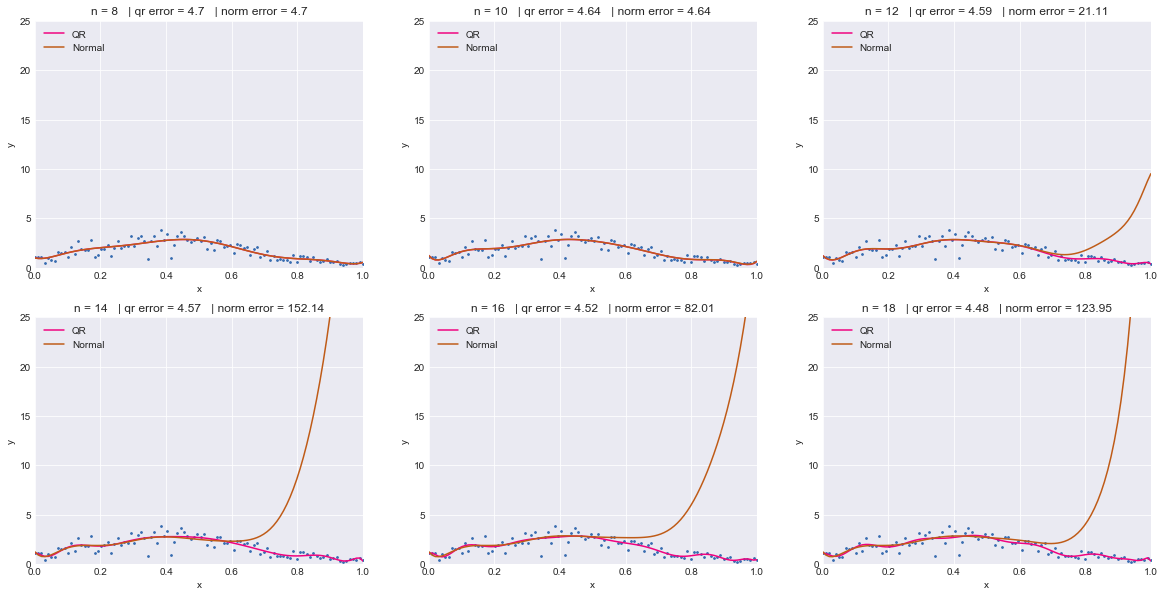

In [98]:
p_5()

### Problem 6

In [137]:
import math
def p_6():
    rel_error = []
    x = sy.Symbol('x')
    for i in range(5, 55, 5):
        n = int(i)
        
        ans_int = float(sy.integrate(x**n * sy.exp(x-1), (x, 0, 1)))
        ans_fac = float(((-1)**n)*(sy.subfactorial(n)) + ((-1)**(n+1))*sy.factorial(n)/math.e)
        
        rel_error.append(abs(ans_int - ans_fac) / abs(ans_int))
    ngrid = np.arange(5,55,5)
    plt.plot(ngrid, rel_error)
    plt.yscale('log')

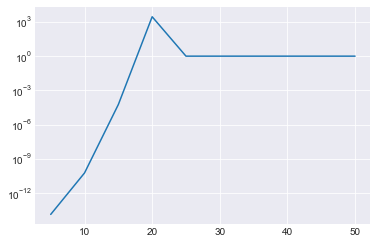

In [138]:
p_6()